In [42]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(color_codes=True)
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# lili
data = pd.read_csv('lili.csv', sep=',',engine='python')
# huilin
#data = pd.read_csv('huilin.csv', sep=',',engine='python')
df = data

In [44]:
# remove nan row
isnan = df['skin'].apply(np.isnan)
notnan = np.invert(isnan)
index = df['skin'].index[notnan]
data_new = data.iloc[index]
# get features and thermal sensation
y = data_new['sensation']
z = data_new['comfort']
x = data_new[['temperature','humidity','skin']]
data = pd.read_csv('lili_feature.csv', sep=',',engine='python')
x_clo = data[['temperature','humidity','skin','clo']]
x.iloc[0].shape

(3,)

In [45]:
import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import datasets, svm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper
from sklearn.ensemble import RandomForestClassifier

In [46]:
# with clo value
mapper = DataFrameMapper([(['temperature'], None),
                         (['humidity'], None),
                          (['skin'], None)])
mapper.fit_transform(x.copy())

# without clo value
# mapper = DataFrameMapper([(['temperature'], None),
#                          (['humidity'], None),
#                           (['skin'], None),
#                          (['clo'],None)])
# x = x_clo
# mapper.fit_transform(x.copy())

array([[ 17.4,  37.9,  28.5],
       [ 17.3,  40.2,  29.2],
       [ 23.5,  35.2,  31. ],
       [ 26.8,  33.1,  32.8],
       [ 26.9,  31.4,  32.3],
       [ 27.8,  32.1,  33.6],
       [ 28.7,  30.4,  34. ],
       [ 29.3,  29.6,  34.8],
       [ 28.1,  30.8,  33.7],
       [ 25.3,  33.1,  34. ],
       [ 24. ,  34.4,  32.7],
       [ 22.6,  32.7,  32.2],
       [ 22.2,  27.6,  32. ],
       [ 22.5,  26.8,  32.2],
       [ 22.4,  27.2,  32.1],
       [ 22.5,  28.3,  32.4],
       [ 22.7,  30. ,  32. ],
       [ 26.6,  28.3,  33.6],
       [ 29.6,  26.3,  34.1],
       [ 28. ,  26.9,  34. ],
       [ 26.9,  28.1,  34.2],
       [ 26.5,  28.6,  33.6],
       [ 26.2,  29. ,  34. ],
       [ 26. ,  25. ,  33.5],
       [ 25.2,  24. ,  33.6],
       [ 25. ,  22.4,  33.4],
       [ 24.6,  25. ,  33.4],
       [ 24.3,  26.1,  32.8],
       [ 19.3,  34.5,  30.8],
       [ 19.2,  34.9,  31.2],
       [ 19.1,  35.3,  30. ],
       [ 19.9,  35.1,  30.4],
       [ 21.5,  34.2,  31.4],
       [ 2

In [47]:
# clf = svm.SVC(kernel='linear')
C=1
#clf = svm.SVC(kernel='poly',degree=3,C=C)
clf = svm.SVC(kernel='rbf',gamma=0.4,C=C)
pipe = sklearn.pipeline.Pipeline([('featurize', mapper),('svc', clf)])

In [48]:
# random forest
clf = RandomForestClassifier(n_estimators=50, max_depth = 3, random_state=0)
pipe = sklearn.pipeline.Pipeline([('featurize', mapper),('randomforest', clf)])

In [49]:
#np.round(cross_val_score(pipe, X=data_new.copy(), y=data_new.comfort, scoring='r2'), 2)
#cross_val_score(pipe, X=x.copy(), y=y, scoring='r2',cv=5)
# thermal sensation
cross_val_score(pipe, X=x.copy(), y=y,cv=5)
# comfort
#cross_val_score(pipe, X=x.copy(), y=z,cv=5)

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.45945946,  0.66666667,  0.54285714,  0.60606061,  0.67741935])

In [50]:
# testing
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score

In [51]:
# thermal sensation prediction
predicted = cross_val_predict(clf, x.copy(), y, cv=5)
matrix_sensation = confusion_matrix(y, predicted)
metrics.accuracy_score(y, predicted) 
# thermal comfort prediction
predicted = cross_val_predict(clf, x.copy(), z, cv=5) 
matrix = confusion_matrix(z, predicted)
metrics.accuracy_score(z, predicted)

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.40116279069767441

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


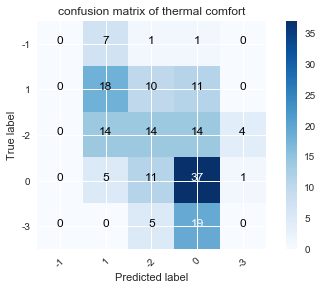

In [53]:
class_names = {'-3','-2','-1','0','1'}
plot_confusion_matrix(matrix,classes=class_names,
                      title='confusion matrix of thermal comfort')

Confusion matrix, without normalization


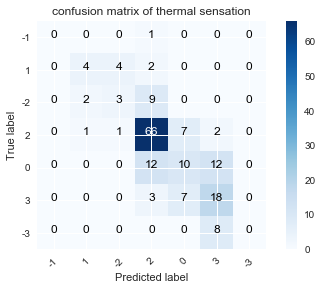

In [54]:
class_names = {'-3','-2','-1','0','1','2','3'}
plot_confusion_matrix(matrix_sensation,classes=class_names,
                      title='confusion matrix of thermal sensation')

In [55]:
test = x.iloc[[0]]
clf.fit(x,y)
gt = y[0]
pred = clf.predict(test)
gt

-1

In [56]:
import pickle
filename = 'rf_model.sav'
filename2 = 'rf_model3.sav'
# python2
pickle.dump(clf,open(filename,'wb'),protocol=2)
# python3
# pickle.dump(clf,open(filename2,'wb'))
# load_model = pickle.load(open(filename,'rb'))
# pred = load_model.predict(test)
# pred

In [57]:
%matplotlib inline
import seaborn as sns

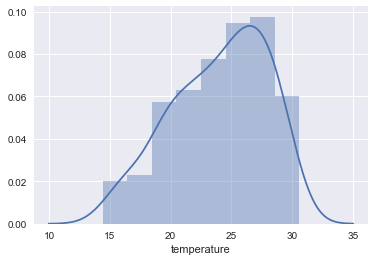

In [58]:
sns.distplot(x['temperature'])

In [59]:

best = 0
for i in range(18):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    score = cross_val_score(knn, x_clo, y, cv=5).mean()
    if score > best:
        best = score
    best_k = i+1
    
# best k is 18

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated

In [60]:
knn = KNeighborsClassifier(n_neighbors=18)
predicted = cross_val_predict(knn, x_clo, y, cv=5)
metrics.accuracy_score(y, predicted) 

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.53488372093023251

In [61]:
knn = KNeighborsClassifier(n_neighbors=18)
predicted = cross_val_predict(knn, x_clo, z, cv=5)
metrics.accuracy_score(z, predicted) 

0.34883720930232559